# Domain Reconstruction

## The GeoTAETr Tests

In [1]:
from Helpers.TF_reconstruction import GeoTAETr
from Main.test_manifold_algorithms import test_manifold_algorithms as tma
from mashspud.SPUD import SPUD

dc = tma("iris.csv", split = "distort", verbose = 0)

2025-02-04 10:05:39.801949: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-04 10:05:39.824373: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-04 10:05:39.830953: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 10:05:39.847982: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-04 10:05:41.972878: W tensorflow/compiler/tf2

RF score on full embedding: 0.9366666666666666
Cross Embedding score: None
Fraction of Samples Closest to thier Match: 0.0002222222222222222


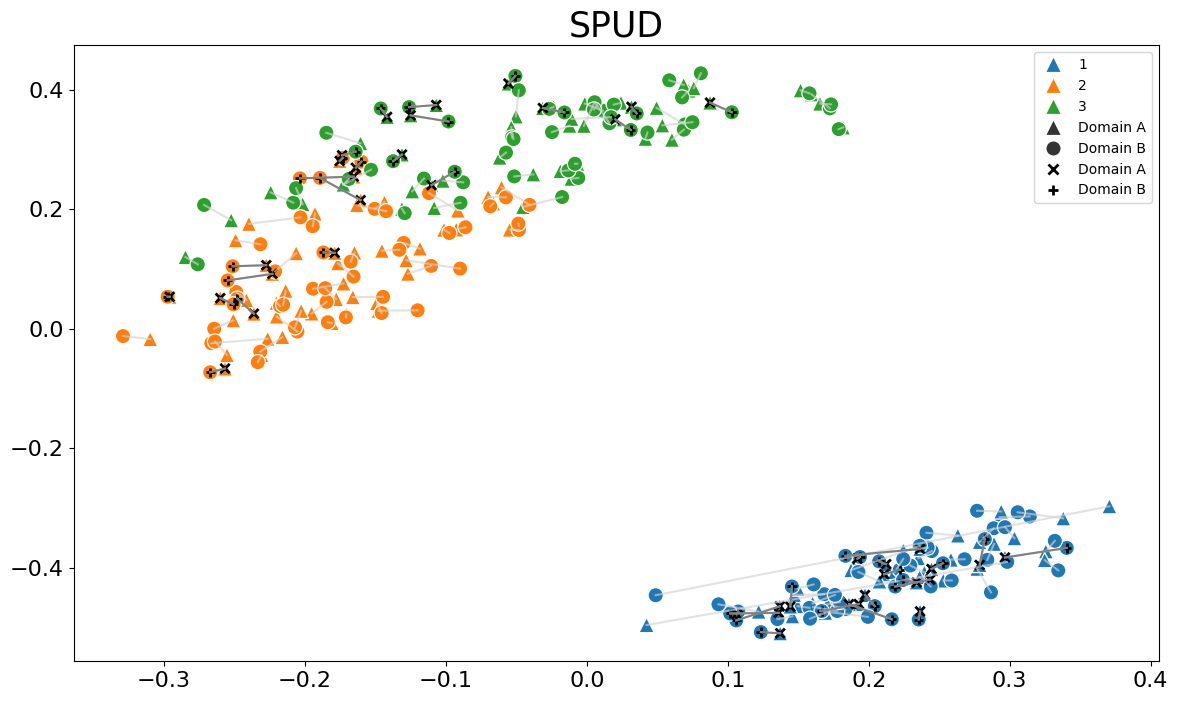

In [2]:
# Fit spud
spud = SPUD()
spud.fit(dc.split_A, dc.split_B, dc.anchors[:40])
spud.plot_emb(labels = dc.labels_doubled)

In [3]:
# Build the GeoTAETr
geo = GeoTAETr(verbose = 3)
geo.fit(dc.split_A, spud.emb[:spud.len_A])

Fitting the autoencoder model...
Building encoder...


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,026 (35.26 KB)

 Trainable params: 9,026 (35.26 KB)

 Non-trainable params: 0 (0.00 B)

Building decoder...


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,028 (35.27 KB)

 Trainable params: 9,028 (35.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0714
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0710
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0706
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0701
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0694
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0687
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0680
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0672
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0663
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0653
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0643
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0632
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0622
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0611
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0601
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━